In [1]:
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv


--2022-12-29 15:14:40--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>] 758.22K  4.36MB/s    in 0.2s    

2022-12-29 15:14:42 (4.36 MB/s) - ‘diabetes.csv’ saved [776415/776415]



In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
feature = data.columns.tolist()

In [4]:
label,feature=feature[-1],feature[:-1]

In [5]:
x,y=data[feature].values,data[label].values

In [6]:
from matplotlib import pyplot as plt

In [48]:
data[feature]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,1354778,0,171,80,34,23,43.509726,1.213191,21
1,1147438,8,92,93,47,36,21.240576,0.158365,23
2,1640031,7,115,47,52,35,41.511523,0.079019,23
3,1883350,9,103,78,25,304,29.582192,1.282870,43
4,1424119,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41
14996,1744410,2,73,66,27,168,30.132636,0.862252,38
14997,1742742,0,93,89,43,57,18.690683,0.427049,24
14998,1099353,0,132,98,18,161,19.791645,0.302257,23


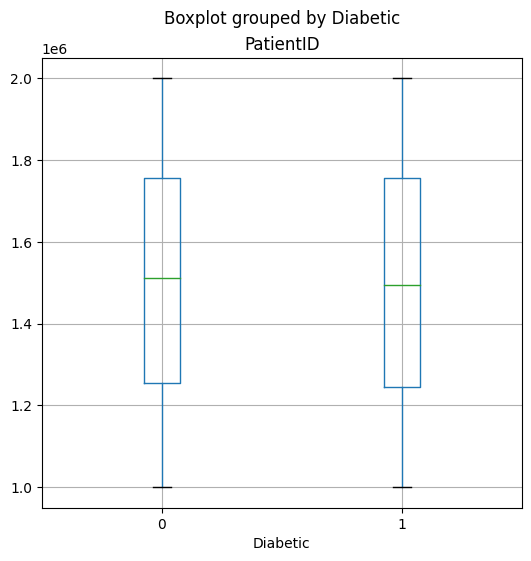

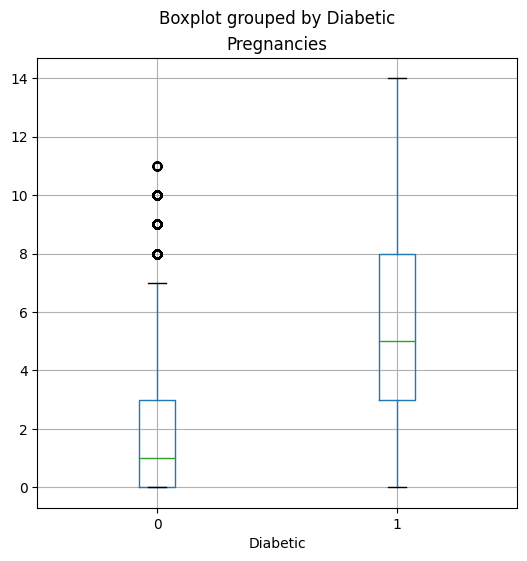

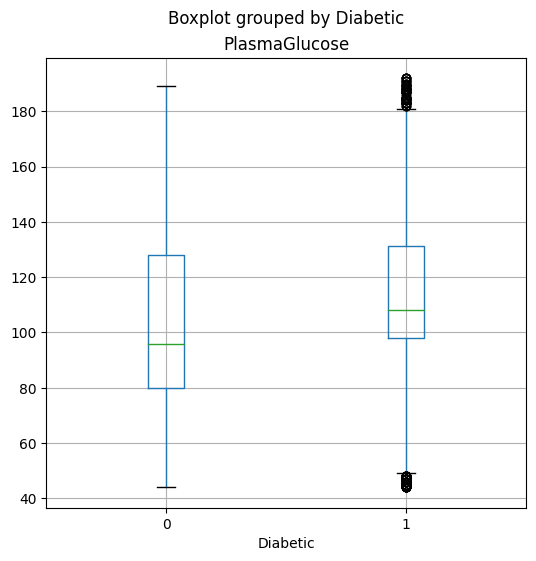

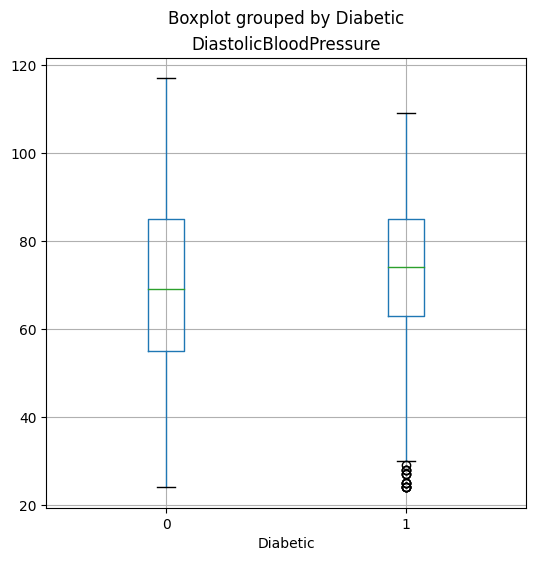

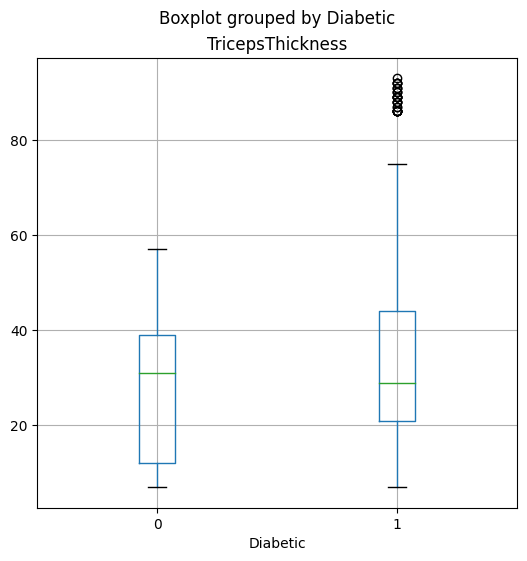

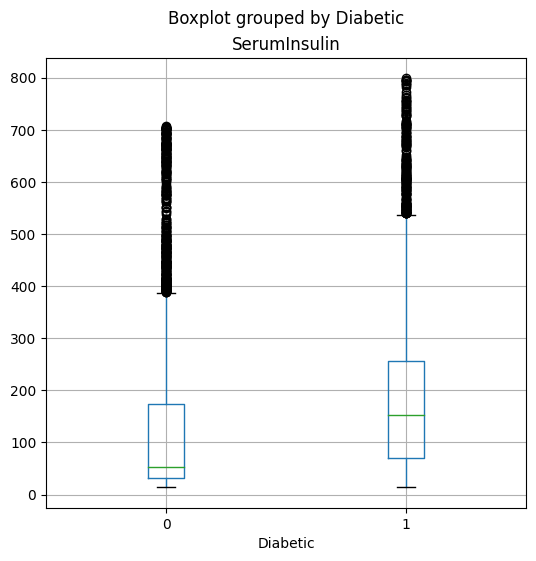

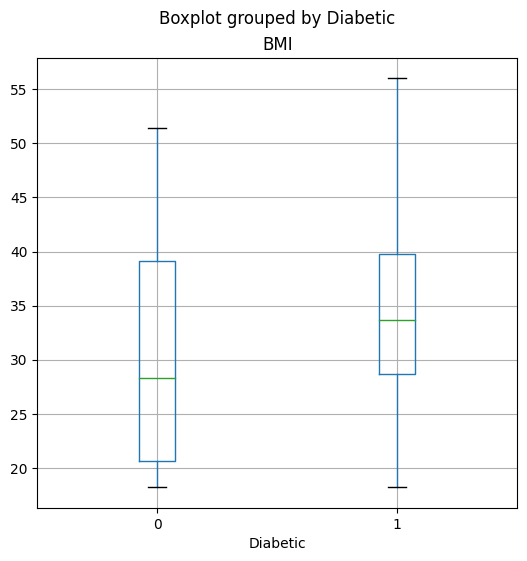

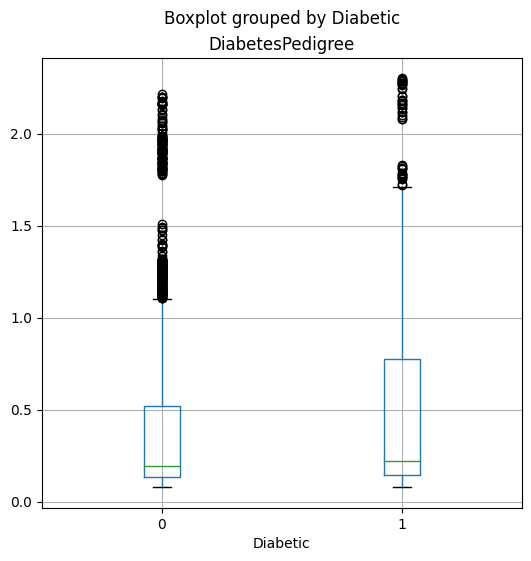

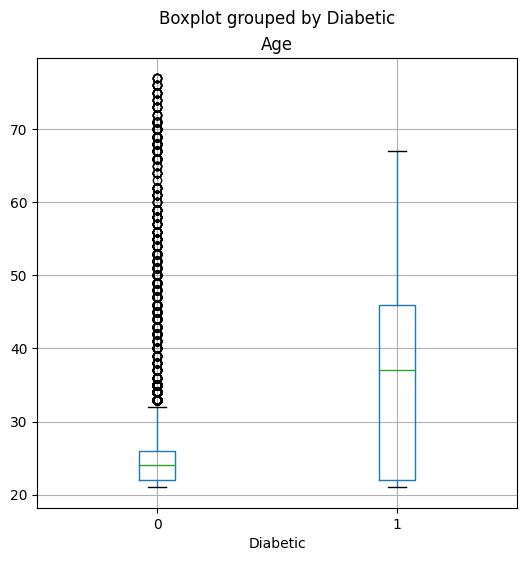

In [7]:
for col in feature:
    data.boxplot(column=col,by='Diabetic',figsize=(6,6))
    plt.title(col)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=123)

In [10]:
print("Train class: %d\nTest class: %d"%(X_train.shape[0],X_test.shape[0]))

Train class: 10500
Test class: 4500


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
reg = 0.01
model = LogisticRegression(C=1/reg,solver='liblinear').fit(X_train,Y_train)

In [13]:
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [14]:
predict = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print(accuracy_score(Y_test,predict))

0.682


In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      3002
           1       0.64      0.10      0.18      1498

    accuracy                           0.68      4500
   macro avg       0.66      0.54      0.49      4500
weighted avg       0.67      0.68      0.59      4500



In [19]:
from sklearn.metrics import precision_score,recall_score

In [20]:
precision_score(Y_test,predict)

0.6378600823045267

In [21]:
recall_score(Y_test,predict)

0.10347129506008011

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(Y_test,predict)

In [24]:
cm

array([[2914,   88],
       [1343,  155]])

In [25]:
score = model.predict_proba(X_test)

In [26]:
from sklearn.metrics import roc_curve

In [27]:
fbr, tpr, thres = roc_curve(Y_test,score[:,1])

In [28]:
thres

array([1.73399126, 0.73399126, 0.72303273, ..., 0.21960639, 0.21920685,
       0.21254684])

/tmp/ipykernel_12016/53109499.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


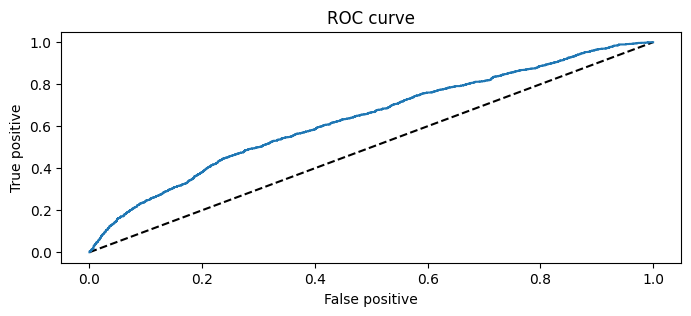

In [29]:
fig = plt.figure(figsize=(8,3))
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr)
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('ROC curve')
fig.show()

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
print(roc_auc_score(Y_test,score[:,1]))

0.6345922922768888


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

In [33]:
numeric,catogary=feature[1:-1],feature[-1]

In [34]:
numeric=[i for i in range(0,7)]
catogary=[7]

In [37]:
numeric_tran=Pipeline(steps=[
    ('scaler',StandardScaler())
])

cat_tran=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocess=ColumnTransformer(
transformers=[
    ('num',numeric_tran,numeric),
    ('cat',cat_tran,catogary)
]
)

pipeline = Pipeline(steps=[('preprocessor',preprocess),
                          ('logregressor',LogisticRegression(C=1/reg,solver='liblinear'))])

In [45]:
len(X_train[0])

9

In [46]:
model=pipeline.fit(X_train,(Y_train))

In [47]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


In [110]:
pred=model.predict(X_test)
score=model.predict_proba(X_test)

In [118]:
cm=confusion_matrix(Y_test,pred)
print(cm)
print('accuracy',accuracy_score(Y_test,pred))
print('presion',precision_score(Y_test,pred))
print('recall',recall_score(Y_test,pred))
auc=roc_auc_score(Y_test,score[:,1])
print("auc",str(auc))

[[2566  436]
 [ 762  736]]
accuracy 0.7337777777777778
presion 0.6279863481228669
recall 0.49132176234979974
auc 0.8140678799803247


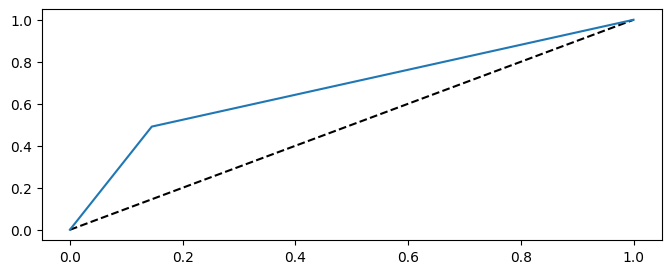

In [120]:
fpr,tpr,thres=roc_curve(Y_test,pred)
plt.figure(figsize=(8,3))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)